In [15]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [283]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [16]:
%matplotlib inline

In [148]:
set_printoptions(formatter={'float': '{:>11.3f}'.format})

# Загрузка данных

In [2]:
breast_cancer_data = load_breast_cancer()
breast_cancer_data, breast_cancer_target = load_breast_cancer(return_X_y=True)

# Матрицы ковариации и признаки

## Диаграмма рассеяния для двух произвольно взятых признаков

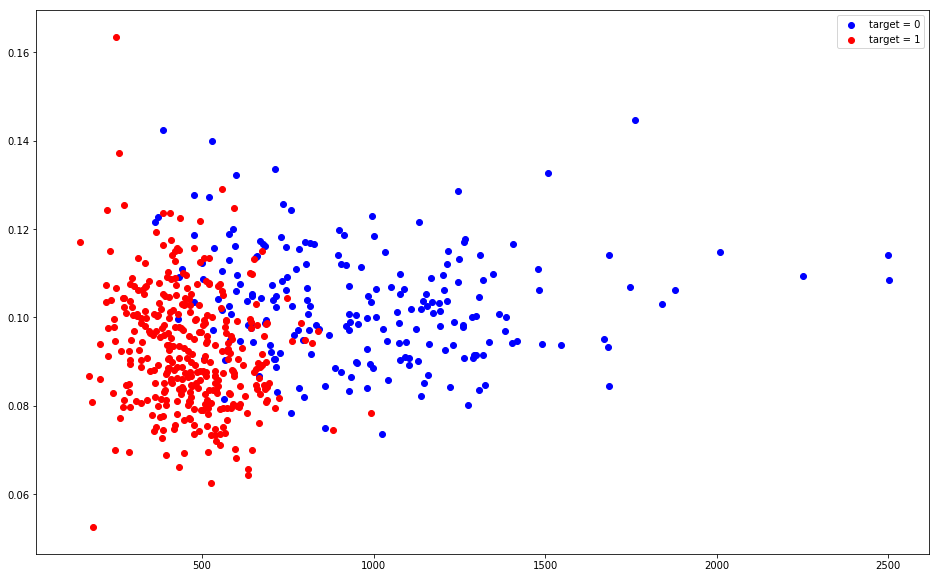

In [101]:
figsize(16, 10)
cmap = ('b', 'r')
for i in range(len(cmap)):
    scatter(breast_cancer_data[breast_cancer_target == i,3], 
            breast_cancer_data[breast_cancer_target == i,4], 
            c=cmap[i], 
            label='target = {}'.format(i))
legend()
None

## Матрица ковариации исходных данных

In [182]:
covariation_matrix = cov(breast_cancer_data.T)
print(covariation_matrix[:6, :6])

[[     12.419       4.908      85.447    1224.483       0.008       0.094]
 [      4.908      18.499      34.440     485.994      -0.001       0.054]
 [     85.447      34.440     590.440    8435.772       0.071       0.715]
 [   1224.483     485.994    8435.772  123843.554       0.876       9.265]
 [      0.008      -0.001       0.071       0.876       0.000       0.000]
 [      0.094       0.054       0.715       9.265       0.000       0.003]]


Для удобства показаны только первые 6 строк и столбцов (и в дальнейшем также)

### Проверка корректности собственных значений и векторов

In [156]:
print(matmul(matmul(eigenvectors, diag(eigenvalues)), inv(eigenvectors))[:6, :6])

[[     12.419       4.908      85.447    1224.483       0.008       0.094]
 [      4.908      18.499      34.440     485.994      -0.001       0.054]
 [     85.447      34.440     590.440    8435.772       0.071       0.715]
 [   1224.483     485.994    8435.772  123843.554       0.876       9.265]
 [      0.008      -0.001       0.071       0.876       0.000       0.000]
 [      0.094       0.054       0.715       9.265       0.000       0.003]]


### Расчет главных компонент

In [153]:
pca = PCA()
breast_cancer_data_pca = pca.fit_transform(breast_cancer_data)

### Матрица ковариации исходных данных, спроецированная на главные компоненты

In [184]:
covariation_matrix_pca = cov(breast_cancer_data_pca.T)
print(covariation_matrix_pca[:6, :6])

[[ 443782.605      -0.000      -0.000       0.000      -0.000       0.000]
 [     -0.000    7310.100       0.000      -0.000      -0.000       0.000]
 [     -0.000       0.000     703.834       0.000      -0.000       0.000]
 [      0.000      -0.000       0.000      54.649       0.000      -0.000]
 [     -0.000      -0.000      -0.000       0.000      39.890      -0.000]
 [      0.000       0.000       0.000      -0.000      -0.000       3.005]]


### Проверка, что главные компоненты ортогональны

In [163]:
print(matmul(pca.components_, pca.components_.T)[:6, :6])

[[      1.000       0.000       0.000       0.000       0.000       0.000]
 [      0.000       1.000      -0.000      -0.000       0.000      -0.000]
 [      0.000      -0.000       1.000      -0.000      -0.000      -0.000]
 [      0.000      -0.000      -0.000       1.000      -0.000       0.000]
 [      0.000       0.000      -0.000      -0.000       1.000      -0.000]
 [      0.000      -0.000      -0.000       0.000      -0.000       1.000]]


При произведении матрицы на ее транспонированный вариант получилась единичная матрица, следовательно исходная матрица была ортогональной. Т.е. все главные компоненты ортогональны

### Сравнение собственных значений матрицы ковариации исходных данных со значениями дисперсии главных компонент

#### Собственные значения матрицы ковариации исходных данных

In [166]:
eigenvalues, eigenvectors = linalg.eig(covariation_matrix)
print(eigenvalues)

[ 443782.605    7310.100     703.834      54.649      39.890       3.005
       1.815       0.371       0.156       0.084       0.032       0.007
       0.003       0.002       0.001       0.001       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000]


#### Значения дисперсии главных компонент

In [205]:
print(diagonal(covariation_matrix_pca))

[ 443782.605    7310.100     703.834      54.649      39.890       3.005
       1.815       0.371       0.156       0.084       0.032       0.007
       0.003       0.002       0.001       0.001       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000]


### Сравнение следов матрицы ковариации исходных данных и матрицы ковариации данных, спроецированных на главные компоненты

#### След матрицы ковариации исходных данных

In [183]:
trace(covariation_matrix)

451896.55625739862

#### След матрицы ковариации исходных данных, спроецированных на главные компоненты

In [188]:
trace(covariation_matrix_pca)

451896.55625739874

Как видно, это значение не изменяется при проецировании на главные компоненты (с точностю до погрешности вычислений)

In [206]:
total_variance = trace(covariation_matrix)

### Графики объясненной дисперсии

In [207]:
explained_variance_ratio = diagonal(covariation_matrix) / total_variance

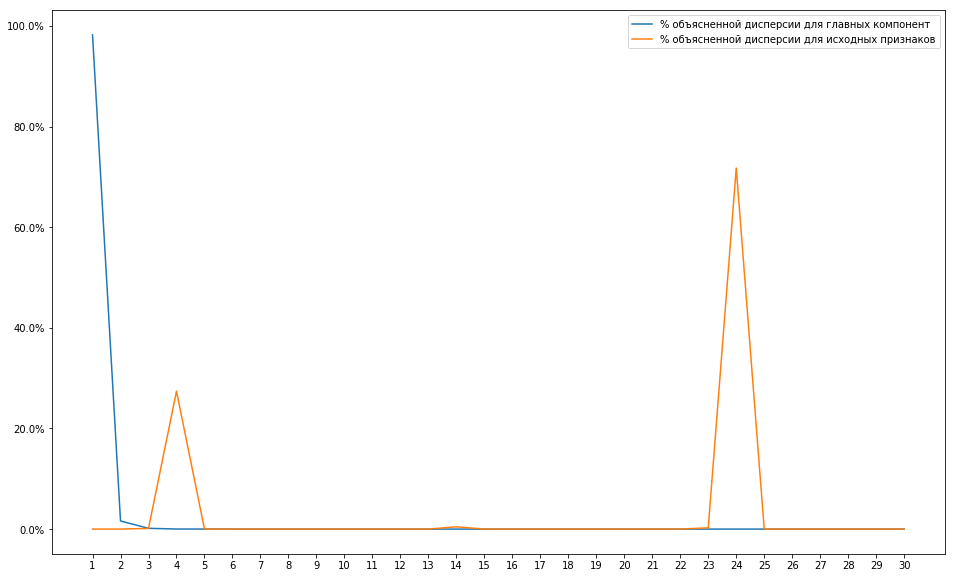

In [256]:
xx = range(1, 31)
axes().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.1%}'))
xticks(xx)
plot(xx, pca.explained_variance_ratio_, label='% объясненной дисперсии для главных компонент')
plot(xx, explained_variance_ratio, label='% объясненной дисперсии для исходных признаков')
legend()
None

# Классификация по исходным данным

## Разбиение выборки на тестовую и тренировочную

In [258]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_target, test_size=0.1, random_state=42)

## Обучение классификатора при произвольном k

In [279]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
print(f'Точность: {knn_clf.score(X_test, y_test):.2%}')

Точность: 96.49%


### Кроссвалидация на 10 фолдов

In [288]:
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
print(cv_scores)

[      0.923       0.942       0.981       0.904       0.904       0.941
       0.941       0.920       0.900       0.880]


# Классификация по данным, спроецированным на главные компоненты